# Klasterizacija automobila na trzistu - Nenadgledano učenje

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram 


### Dataset import

In [35]:
data_frame = pd.read_csv("cardekho_dataset.csv")

inicial_count = len(data_frame)
data_frame.dropna(inplace=True)
count_after_missig_values = len(data_frame)
print("Droped " + str(inicial_count-count_after_missig_values) + " rows with missing values")

# Deleting unvanted column for indexing
data_frame.drop("Unnamed: 0", axis=1, inplace=True) 
data_frame.drop_duplicates() # 167 duplicates of 14000 

Droped 0 rows with missing values


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


### Data Analysis

c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Nemanja\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

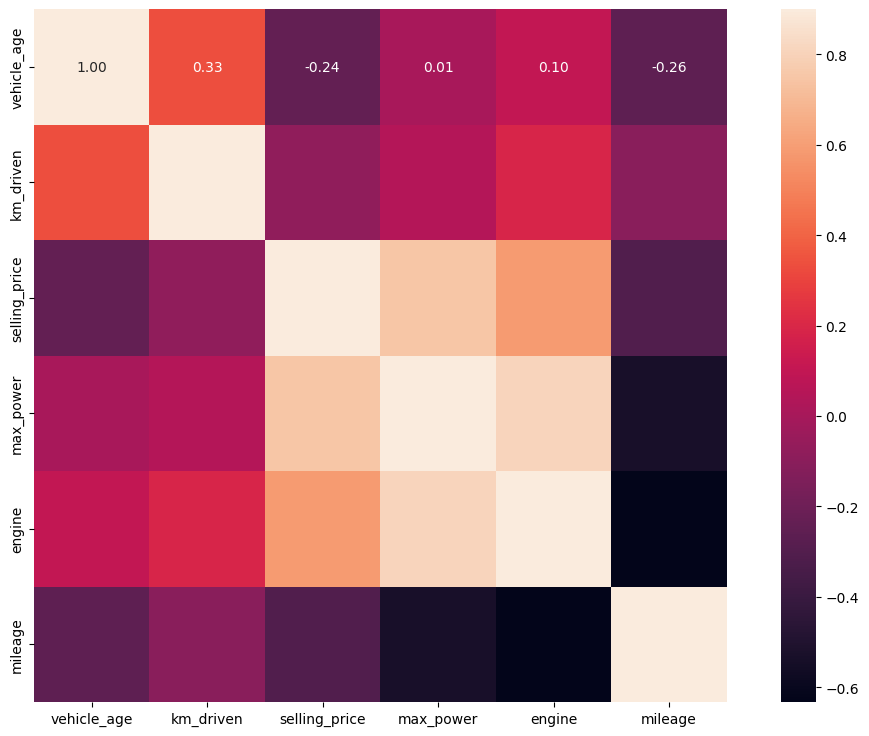

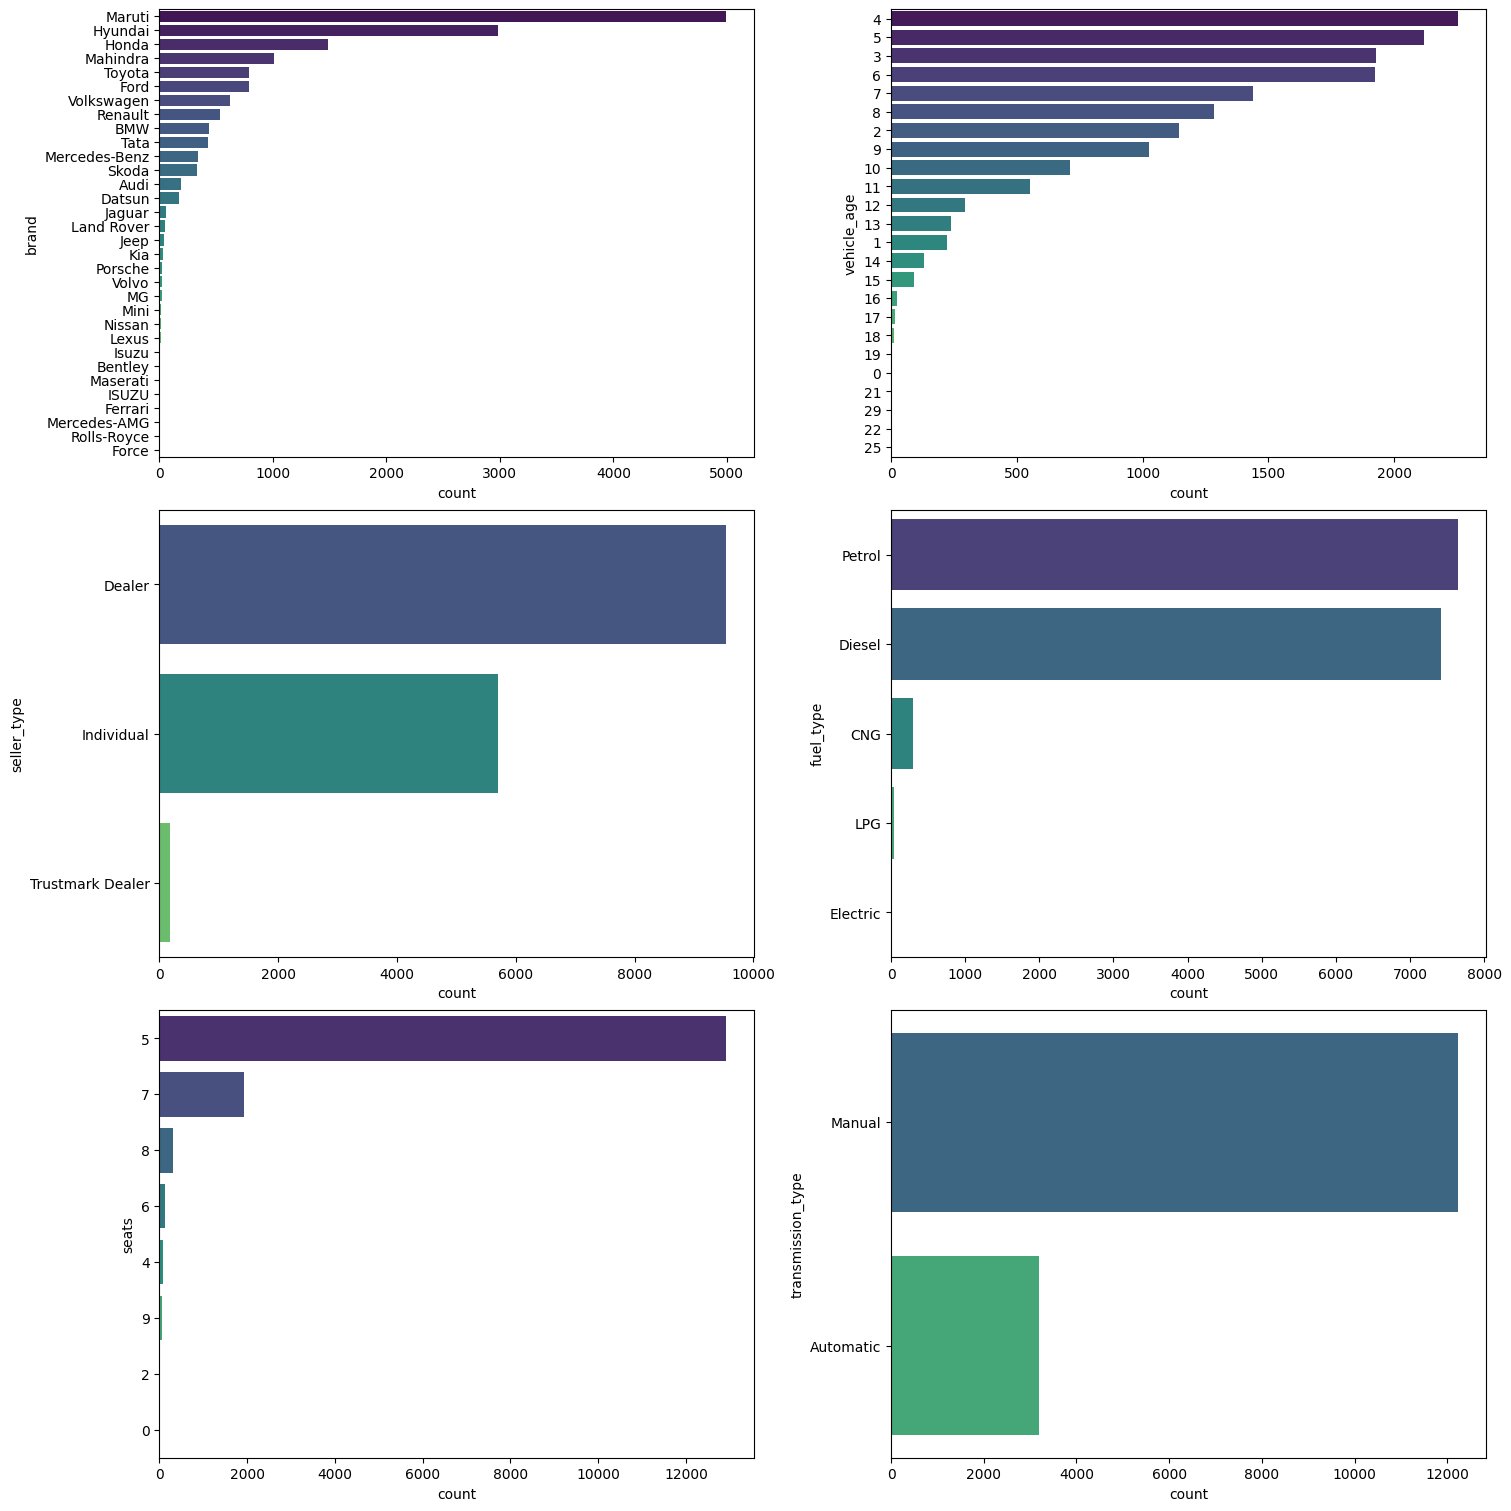

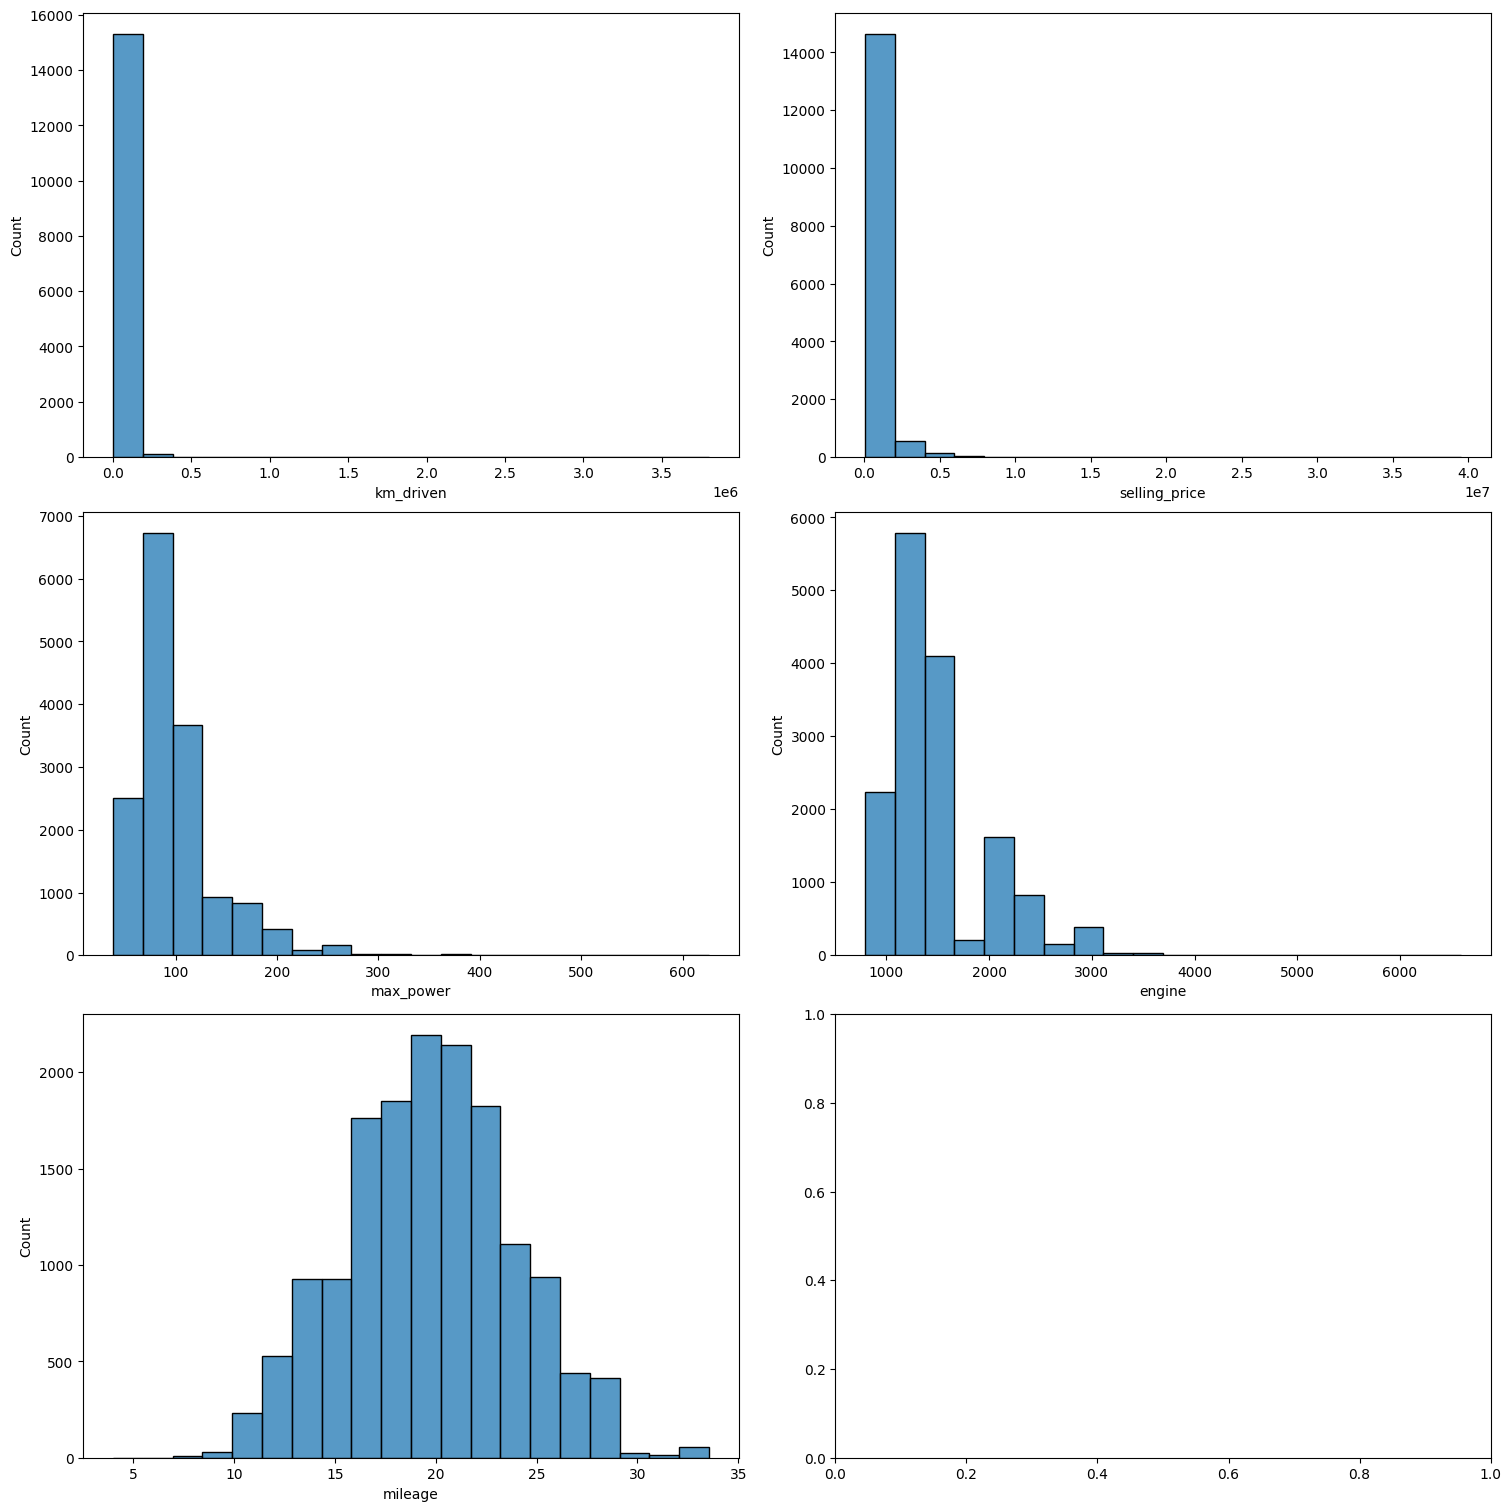

In [40]:
data_frame_correlation = pd.DataFrame(data_frame[['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']])

# Run correlation matrix and plot

corr = data_frame_correlation.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, vmax=0.9, fmt='.2f', square=True)

fig, axs = plt.subplots(3, 2, figsize=(15,15), constrained_layout=True)
categorical = ['brand', 'vehicle_age', 'seller_type', 'fuel_type', 'seats', 'transmission_type']
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=data_frame, ax=axs[i//2][i%2], order=data_frame[f].value_counts().index, palette='viridis')

fig, axs = plt.subplots(3, 2, figsize=(15,15), constrained_layout=True)
numerical = ['km_driven', 'selling_price', 'max_power', 'engine', 'mileage']
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=data_frame, ax=axs[i//2][i%2], bins=20)

### Data manipulation

<Axes: >

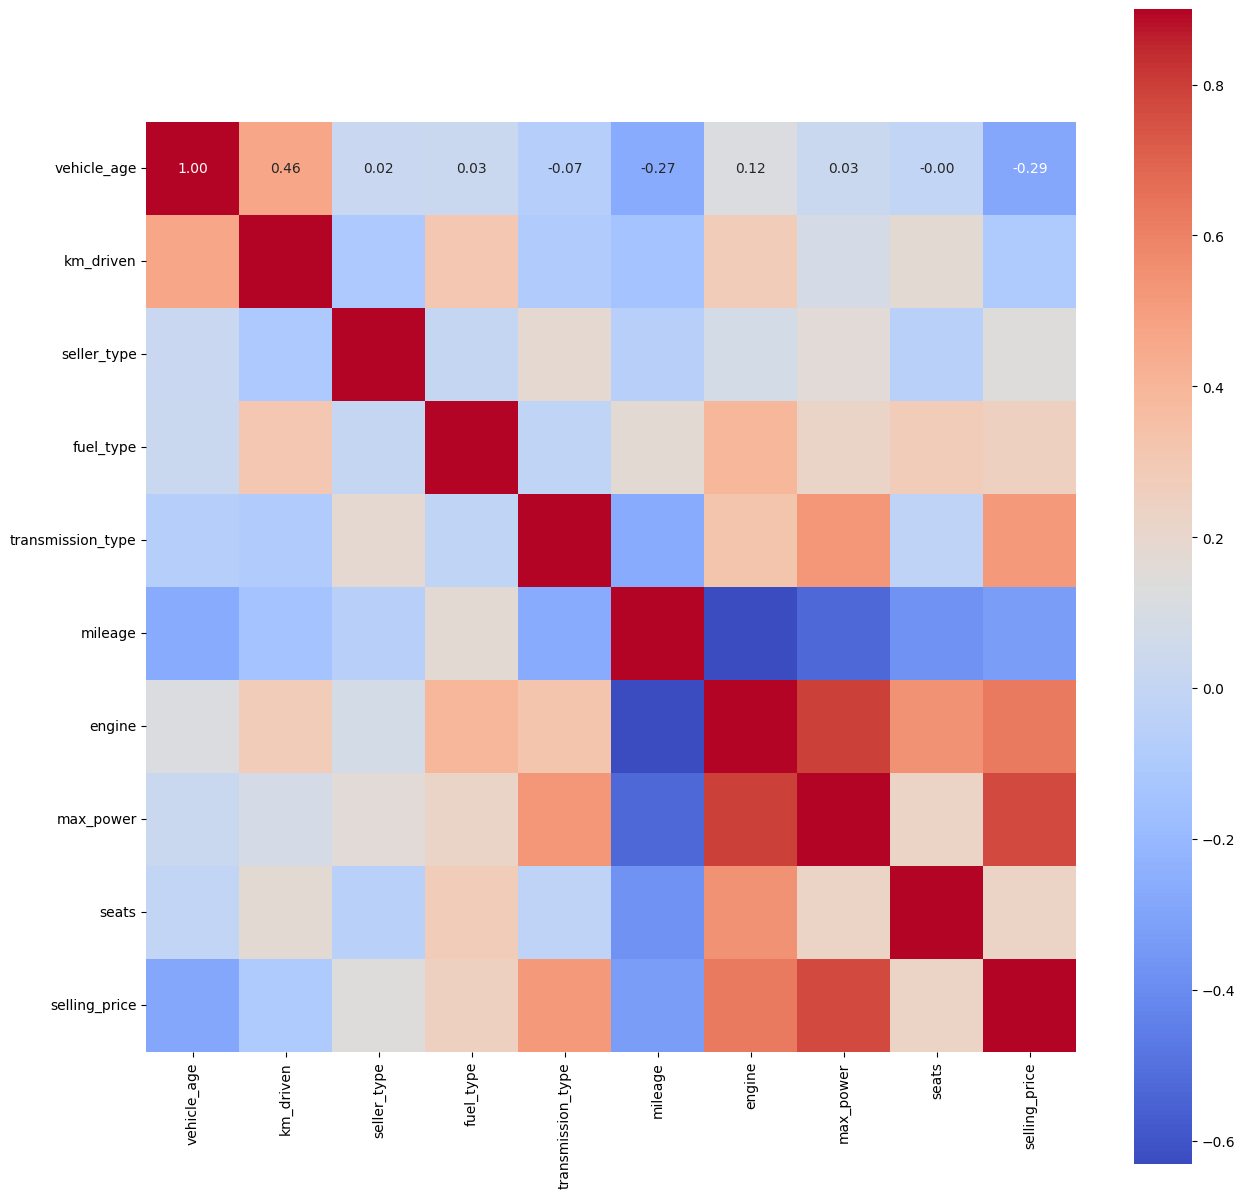

In [44]:
data_frame_shuffled = data_frame.sample(frac=1) # Shuffle
data_frame_shuffled.reset_index(drop=True, inplace=True)
data_frame_shuffled_original = pd.DataFrame(data_frame_shuffled)
data_frame_shuffled.drop("car_name", axis=1, inplace=True)
data_frame_shuffled.drop("brand", axis=1, inplace=True)
data_frame_shuffled.drop("model", axis=1, inplace=True)


# Enumerate the categorical features
# car_name_mapping = {car_name: idx for idx, car_name in enumerate(data_frame_shuffled['car_name'].unique())}
# data_frame_shuffled['car_name'] = data_frame_shuffled['car_name'].map(car_name_mapping)

fuel_type_mapping = {fuel_type: idx for idx, fuel_type in enumerate(data_frame['fuel_type'].unique())}
data_frame_shuffled['fuel_type'] = data_frame_shuffled['fuel_type'].map(fuel_type_mapping)

transmission_type_mapping = {trans_type: idx for idx, trans_type in enumerate(data_frame['transmission_type'].unique())}
data_frame_shuffled['transmission_type'] = data_frame_shuffled['transmission_type'].map(transmission_type_mapping)

transmission_type_mapping = {seller_type: idx for idx, seller_type in enumerate(data_frame['seller_type'].unique())}
data_frame_shuffled['seller_type'] = data_frame_shuffled['seller_type'].map(transmission_type_mapping)

transmission_type_mapping = {seats: idx for idx, seats in enumerate(data_frame['seats'].unique())}
data_frame_shuffled['seats'] = data_frame_shuffled['seats'].map(transmission_type_mapping)

# Display the enumerated data
data_frame_shuffled.head()

# Extract numerical features for clustering
numerical_features = ['vehicle_age', 'km_driven', 'selling_price', 'max_power', 'engine', 'mileage']

outlier_detector = EllipticEnvelope(contamination=.01)

# Fit detector
outlier_detector.fit(data_frame_shuffled[numerical_features])

# Predict outliers
outliers = outlier_detector.predict(data_frame_shuffled[numerical_features])
outliers_indices = outliers == -1
data_frame_shuffled = data_frame_shuffled[~outliers_indices]
data_frame_shuffled_original = data_frame_shuffled_original[~outliers_indices]

# Standardize the numerical features
scaler = MinMaxScaler(feature_range=(-1, 1))
data_frame_shuffled[numerical_features] = scaler.fit_transform(data_frame_shuffled[numerical_features])

data_frame_shuffled.tail()

corr_matrix = data_frame_shuffled.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, vmax=.9, fmt='.2f', square=True, cmap='coolwarm')


In [49]:
from scipy.cluster import hierarchy 

x = data_frame_shuffled.values
# Plot the hierarchical clustering as a dendrogram.
temp = hierarchy.linkage(x, 'single')
plt.figure()
dn = hierarchy.dendrogram(
    temp, above_threshold_color="green", color_threshold=.7, orientation='top')


ValueError: orientation must be one of 'top', 'left', 'bottom', or 'right'

<Figure size 640x480 with 0 Axes>

### Elbow metoda za odredjianje broja klastera

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

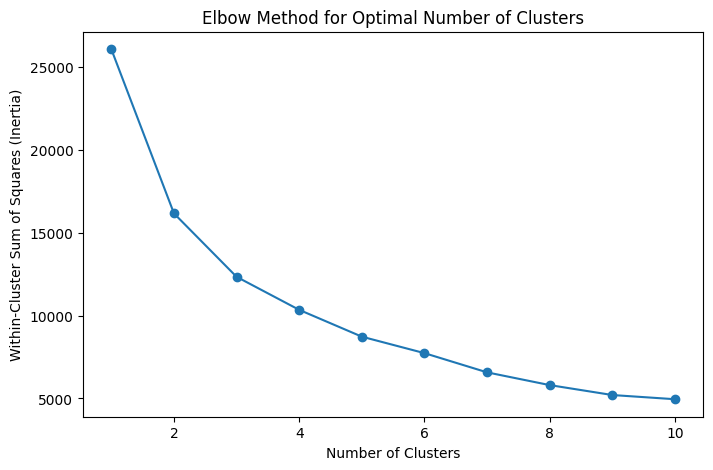

In [ ]:
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_frame_shuffled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

### Klasterizacija k-means algoritmom

C:\Users\Nemanja\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


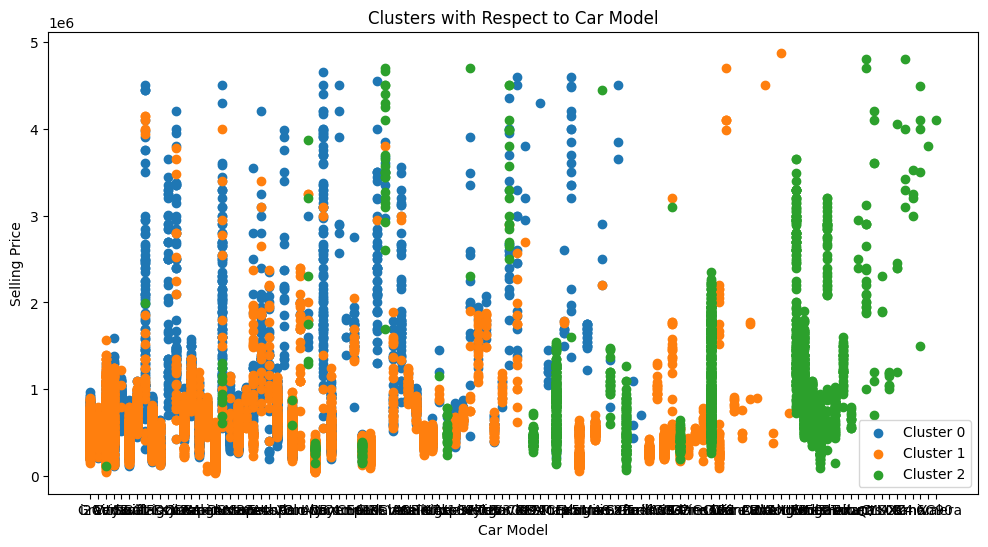

In [ ]:
# Apply K-Means clustering
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_frame_shuffled['cluster'] = kmeans.fit_predict(data_frame_shuffled)

data_frame_shuffled_original['cluster'] = data_frame_shuffled['cluster']


data_frame_shuffled_original.to_csv('result.csv')

# Plot clusters with respect to 'car_name'
plt.figure(figsize=(12, 6))
for cluster_id in range(num_clusters):
    cluster_data = data_frame_shuffled_original[data_frame_shuffled_original['cluster'] == cluster_id]
    plt.scatter(cluster_data['model'], cluster_data['selling_price'], label=f'Cluster {cluster_id}')

plt.xlabel('Car Model')
plt.ylabel('Selling Price')
plt.title('Clusters with Respect to Car Model')
plt.legend()
plt.show()
